# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy>Recurrent Neural Networks</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
 <center> habibnia@vt.edu </center> 

#### If you’re looking for more math: Goodfellow’s Deep Learning chapter on LSTM  
https://www.deeplearningbook.org/contents/rnn.html

- Feed Forward networks cannot handle sequential data. This means that they cannot work with inputs of different sizes and they do not store information about previous states (memory). Recurrent Neural Networks (RNNs) allowing overcome named limitations.

- The idea behind RNNs is to make use of sequential information. In a traditional neural network we assume that all inputs (and outputs) are independent of each other. But for many tasks that’s a very bad idea. If you want to predict the next word in a sentence you better know which words came before it. RNNs are called recurrent because they perform the same task for every element of a sequence, with the output being depended on the previous computations. 

- Another way to think about RNNs is that they have a “memory” which captures information about what has been calculated so far. In theory RNNs can make use of information in arbitrarily long sequences, but in practice they are limited to looking back only a few steps. Recurrent neural networks are used in speech recognition, language translation, stock predictions; It’s even used in image recognition to describe the content in pictures. 

- Technically, Recurrent Networks can be represented as Feed Forward networks expanded with a state variable and a recurrent loop.

- Input sequences for a RNN are 3D tensors. Axis are: batch size (number of sequences in the batch), time steps for each sequence, and features (values of attributes at a specific time step).

Here is what a typical RNN looks like:

 <table><tr>    <td> <img src="images/1.png" alt="Drawing" style="width: 350px;"/> </td>
    <td> <img src="images/2.png" alt="Drawing" style="width: 550px;"/> </td>
</tr></table>

  <img src="images/11.png" alt="Drawing" style="width: 550px;"/>


As Recurrent Networks are applied in a variety of real-world problems, we can see different variations of the RNN architecture, which do not significantly alter the math behind. The examples of such application and respective models can be: (a) language translation, (b) video classification, (c ) image captioning, (d) autocomplete system.


The below diagrams shows a RNN being unrolled (or unfolded) into a full network. By unrolling we simply mean that we write out the network for the complete sequence. For example, if the sequence we care about is a sentence of 5 words, the network would be unrolled into a 5-layer neural network, one layer for each word.

 <table><tr>    <td> <img src="images/3.png" alt="Drawing" style="width: 450px;"/> </td>
    <td> <img src="images/4.png" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

 <table><tr>    <td> <img src="images/5.png" alt="Drawing" style="width: 450px;"/> </td>
    <td> <img src="images/6.png" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

 <table><tr>    <td> <img src="images/7.png" alt="Drawing" style="width: 450px;"/> </td>
    <td> <img src="images/8.png" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

 <table><tr>    <td> <img src="images/9.png" alt="Drawing" style="width: 450px;"/> </td>
    <td> <img src="images/10.png" alt="Drawing" style="width: 450px;"/> </td>
</tr></table>

## Mathematical understanding of RNN 

  <img src="images/12.png" alt="Drawing" style="width: 550px;"/>

  <img src="images/13.png" alt="Drawing" style="width: 550px;"/>
  
  - Unlike a traditional deep neural network, which uses different parameters at each layer, a RNN shares the same parameters across all steps. This reflects the fact that we are performing the same task at each step, just with different inputs. This greatly reduces the total number of parameters we need to learn.
  
  
  <img src="images/14.png" alt="Drawing" style="width: 750px;"/>
  
  
  
Training an RNN is similar to training a traditional Neural Network. We also use the backpropagation algorithm, but with a little twist. Because the parameters are shared by all time steps in the network, the gradient at each output depends not only on the calculations of the current time step, but also the previous time steps. For example, in order to calculate the gradient at t=4 we would need to backpropagate 3 steps and sum up the gradients. This is called Backpropagation Through Time (BPTT). 


#### Limitations of RNN

For now, just be aware of the fact that vanilla RNNs trained with BPTT have difficulties learning long-term dependencies (e.g. dependencies between steps that are far apart) due to what is called the vanishing/exploding gradient (the slope of the loss function along with the error function) problem.

1. Vanishing Gradient problem occurs when the gradient becomes so small that updating parameters becomes insignificant; eventually the algorithm stops learning. When gradients are propagated back through time, they can shrink exponentially, making it difficult to learn long-term dependencies.

2. Exploding Gradient problem occurs when the gradient becomes too large, which makes the model unstable. In this case, larger error gradients accumulate, and the model weights become too large. This issue can cause longer training times and poor model performance.

There exists some machinery (i.e. reduce the number of hidden layers) to deal with these problems, and certain types of RNN architectures (like LSTMs and GRU) were specifically designed to get around them. 

http://proceedings.mlr.press/v28/pascanu13.pdf

https://towardsdatascience.com/the-exploding-and-vanishing-gradients-problem-in-time-series-6b87d558d22
  
  <img src="images/15.png" alt="Drawing" style="width: 750px;"/>
  
  <img src="images/16.png" alt="Drawing" style="width: 750px;"/>




### Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU)

#### LSTM

LSTM units include a memory cell that can maintain information in memory for long periods. The key to LSTMs is the use of three gates: input, forget, and output gates, which control the flow of information into and out of the cell, thereby addressing the vanishing gradient problem. LSTMs don’t have a fundamentally different architecture from RNNs, but they use a different function to compute the hidden state. The memory in LSTMs are called cells and you can think of them as black boxes that take as input the previous state h_{t-1} and current input x_t. Internally these cells  decide what to keep in (and what to erase from) memory. They then combine the previous state, the current memory, and the input. It turns out that these types of units are very efficient at capturing long-term dependencies. 

- **Forget Gate:** 

$f_t = σ(W_f · [h_{t-1}, x_t] + b_f)$

- Decide what information to discard from the cell state.
- `σ` denotes the sigmoid function, `W_f` the weight matrix for the forget gate, `[h_{t-1}, x_t]` the concatenation of the previous hidden state and current input, and `b_f` the bias term.

- **Input Gate:** 

$i_t = σ(W_i · [h_{t-1}, x_t] + b_i)$
$C~t = tanh(W_C · [h{t-1}, x_t] + b_C)$

- Determine which new information to add to the cell state.
- `i_t` is the input gate's activation, `C~_t` is the candidate value for addition to the cell state, and `W_i`, `W_C` are the weight matrices.

- **Update Cell State:**

$C_t = f_t * C_{t-1} + i_t * C~_t$

- Update the old cell state `C_{t-1}` to the new cell state `C_t`.

- **Output Gate:** Determines the next hidden state based on the cell state and the output of the forget and input gates.

$o_t = σ(W_o · [h_{t-1}, x_t] + b_o)$
$h_t = o_t * tanh(C_t)$

- Determine the next hidden state, `h_t`, which will be used for predictions and passed to the next time step.



  <img src="images/17.png" alt="Drawing" style="width: 650px;"/>
  
  <img src="images/18.PNG" alt="Drawing" style="width: 600px;"/>

#### GRU

GRU is a simplified version of the LSTM with only two gates: update and reset, which makes it computationally more efficient than LSTM while achieving comparable performance in many tasks. It combines the forget and input gates into a single update gate and mergs the cell state and hidden state.


- **Update Gate:** 

$z_t = σ(W_z · [h_{t-1}, x_t] + b_z)$

- Determine how much of the past information to keep.
- `z_t` is the update gate's activation.

- **Reset Gate:** Decides how much of the past information to forget.

$r_t = σ(W_r · [h_{t-1}, x_t] + b_r)$

- Decide how much of the past information to forget.

- **Candidate Hidden State:**

$h~t = tanh(W_h · [r_t * h{t-1}, x_t] + b_h)$

- Compute the candidate hidden state to be added to the actual hidden state.

- **Actual Hidden State:**

$h_t = (1 - z_t) * h_{t-1} + z_t * h~_t$

- Update the hidden state by blending the old state with the new candidate state.

> 
For time series forecasting, the LSTM or GRU model processes each time step of the input sequence, updating its internal states (cell state for LSTM, hidden state for GRU) according to the rules defined above. The final output can be generated from the hidden state of the last time step, optionally passing through additional layers like dense or output layers to match the forecasting task's requirements (e.g., predicting the next value in the series).



### Comparison between Vanilla RNN, LSTM, and GRU

| Feature | Vanilla RNN | LSTM | GRU |
|---------|-------------|------|-----|
| Complexity | Simplest | More complex | Less complex than LSTM |
| Gates | None | 3 gates (input, forget, output) | 2 gates (update, reset) |
| Memory Cell | No | Yes | No |
| Performance | Struggles with long sequences | Better at capturing long-term dependencies | Comparable to LSTM, often faster |


Both LSTM and GRU architectures provide effective solutions to the limitations of vanilla RNNs, particularly in tasks that involve long-term dependencies. The choice between LSTM and GRU can depend on the specific requirements of the task, computational resources, and the need for training efficiency.


### Stock Market Predictions with LSTM and GRU in Python

In this task, the future stock prices of State Bank of India (SBIN) are predicted using the LSTM Recurrent Neural Network. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

import yfinance as yf

In [12]:
# Set the stock symbol for State Bank of India on Yahoo Finance
stock_symbol = 'SBIN.NS'  # '.NS' denotes NSE for Yahoo Finance

# Fetch the historical stock data
df = yf.download(stock_symbol, start='2020-01-01', end='2024-01-01')

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,334.700012,335.950012,332.149994,334.450012,320.078278,17379320
2020-01-02,334.500000,339.850006,333.350006,339.299988,324.719818,20324236
2020-01-03,337.950012,337.950012,332.000000,333.700012,319.360504,21853208
2020-01-06,331.700012,331.700012,317.700012,319.000000,305.292145,35645325
2020-01-07,324.450012,327.000000,315.399994,318.399994,304.717926,50966826


In [13]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

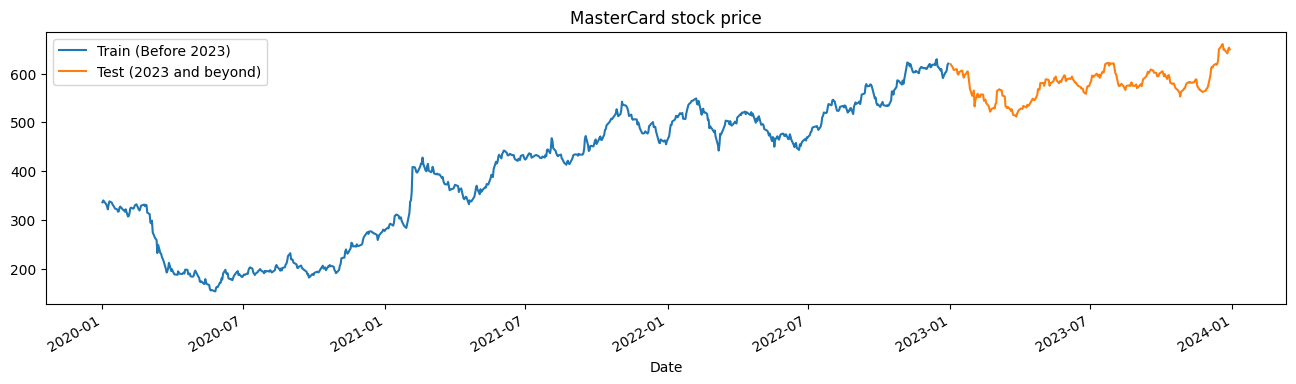

In [15]:
tstart = 2020
tend = 2022

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(df,tstart,tend)


In [16]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(df, tstart, tend)


In [17]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [18]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [19]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [20]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               63500     
                                                                 
 dense (Dense)               (None, 1)                 126       
                                                                 
Total params: 63626 (248.54 KB)
Trainable params: 63626 (248.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
22/22 [==============================] - 4s 57ms/step - loss: 0.0242
Epoch 2/50
22/22 [==============================] - 1s 58ms/step - loss: 0.0037
Epoch 3/50
22/22 [==============================] - 1s 59ms/step - loss: 0.0035
Epoch 4/50
22/22 [==============================] - 1s 57ms/step - loss: 0.0024
Epoch 5/50
22/22 [==============================] - 1s 57ms/step - loss: 0.0030
Epoch 6/50
22/22 [==============================] - 1s 58ms/step - loss: 0.0020
Epoch 7/50
22/22 [==============================] - 1s 61ms/step - loss: 0.0020
Epoch 8/50
22/22 [==============================] - 2s 104ms/step - loss: 0.0020
Epoch 9/50
22/22 [==============================] - 1s 63ms/step - loss: 0.0016
Epoch 10/50
22/22 [==============================] - 1s 59ms/step - loss: 0.0018
Epoch 11/50
22/22 [==============================] - 1s 57ms/step - loss: 0.0016
Epoch 12/50
22/22 [==============================] - 1s 57ms/step - loss: 0.0012
Epoch 13/50
22/22 [=================

In [23]:
dataset_total = df.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 1s 25ms/step


In [24]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))


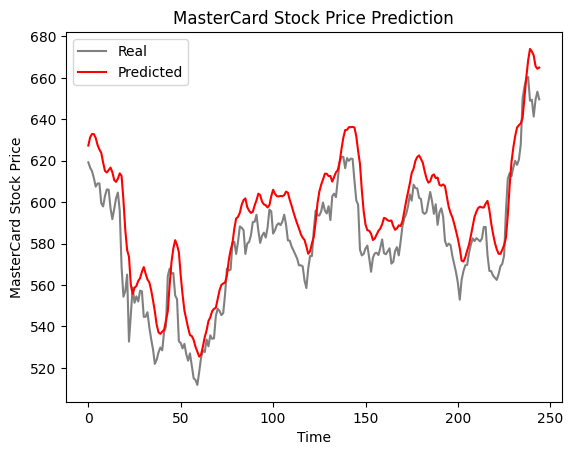

In [25]:
plot_predictions(test_set,predicted_stock_price)

In [26]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 16.29.


In [27]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 125)               48000     
                                                                 
 dense_1 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48126 (187.99 KB)
Trainable params: 48126 (187.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
22/22 [==============================] - 4s 45ms/step - loss: 0.0189
Epoch 2/50
22/22 [==============================] - 1s 45ms/step - loss: 0.0022
Epoch 3/50
22/22 [==============================] - 1s 45ms/step - loss: 0.0019
Epoch 4/50
22/22 [==============================] - 1s 45ms/step - loss: 0.0018
Epoch 5/50
22/22 [==============================] - 1s 44ms/step - loss: 0.0019
Epoch 6/50
22/22 [==============================] - 2s 68ms/step - loss: 0.0012
Epoch 7/50
22/22 [==============================] - 1s 68ms/step - loss: 0.0015
Epoch 8/50
22/22 [==============================] - 2s 69ms/step - loss: 0.0013
Epoch 9/50
22/22 [==============================] - 2s 108ms/step - loss: 0.0011
Epoch 10/50
22/22 [==============================] - 1s 59ms/step - loss: 0.0012
Epoch 11/50
22/22 [==============================] - 1s 45ms/step - loss: 0.0011
Epoch 12/50
22/22 [==============================] - 1s 44ms/step - loss: 8.9459e-04
Epoch 13/50
22/22 [=============

8/8 [==============================] - 0s 13ms/step


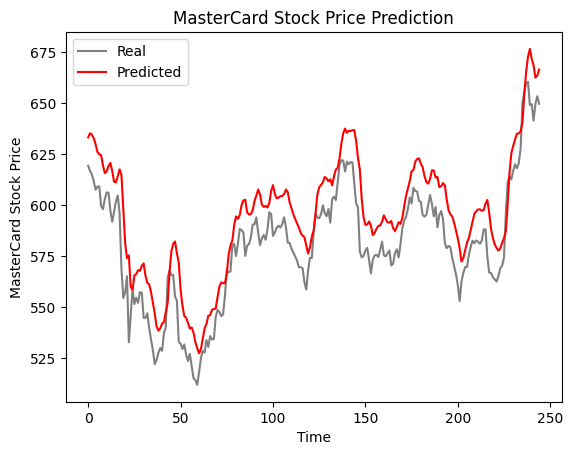

In [29]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)

In [30]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 17.12.


### Bidirectional Recurrent Neural Network (BiRNN)

A Bidirectional Recurrent Neural Network (BiRNN) is a type of Recurrent Neural Network (RNN) where the sequence is processed in both forward and backward directions. This architecture is designed to capture dependencies in both directions and provide more context to the model, improving its ability to understand the data.

 <img src="images/BiRNN.PNG" alt="Drawing" style="width: 500px;"/>

#### Structure of Bidirectional RNN
In a traditional RNN, the information moves only in one direction, from the past to the future. However, in a BiRNN, there are two separate layers for each time step:

1. Forward Layer: Processes the sequence from the start to the end (just like a standard RNN).
2. Backward Layer: Processes the sequence from the end to the start, providing the model with information from the future.

The outputs of these two layers are typically concatenated or added at each time step, providing a combined representation that includes information from both past and future contexts.

#### Applications
BiRNNs are particularly useful in tasks where the context of the entire sequence is crucial for understanding each part of it. Some common applications include:

- Natural Language Processing (NLP): In tasks like sentiment analysis, named entity recognition, or machine translation, the meaning of a word can depend on the words that come both before and after it.
- Speech Recognition: In transcribing spoken language, the sounds before and after a given sound can provide useful context for identifying that sound correctly.
- Time Series Analysis: When the future context is as important as the past context for predicting the current value.

***Advantages***

- Enhanced Contextual Understanding: By considering both past and future input features for every time step, BiRNNs can capture a richer understanding of the context around each part of the sequence.
- Improved Accuracy: For many tasks, this additional context leads to higher accuracy because the model has access to all relevant information when making predictions.

***Limitations***

- Increased Computational Cost: Processing sequences in both directions essentially doubles the computation compared to a unidirectional RNN, which can increase training and inference times.
- Dependency on Complete Sequences: BiRNNs require access to the entire sequence before processing can begin, making them unsuitable for real-time applications where the full sequence is not immediately available.


### Sentiment Analysis with Bidirectional RNN

#### Dataset: IMDB Movie Reviews

The IMDB dataset consists of 50,000 movie reviews from the Internet Movie Database, labeled as positive or negative. It's a balanced dataset with an equal number of positive and negative reviews. The dataset is divided into two sets:

- **Training Set:** 25,000 reviews
- **Test Set:** 25,000 reviews

The reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). Words are indexed by their overall frequency in the dataset, allowing for quick filtering operations such as only considering the top 10,000 most common words.

#### Goal

The primary goal of the example is to build and train a Bidirectional Recurrent Neural Network (BiRNN) to perform sentiment analysis on the IMDB movie review dataset. The model aims to classify each review as either positive or negative based on the text content of the review.


#### Model Overview

The model consists of the following layers:

- **Embedding Layer:** Transforms the integer-encoded vocabulary into dense vector representations. The layer takes the top 10,000 most common words and maps each word to a 128-dimensional vector space.
- **Bidirectional LSTM Layer:** A bidirectional wrapper for LSTM layers that allows the model to capture dependencies from both past and future context. The LSTM has 64 units.
- **Dense Output Layer:** A fully connected layer with a single output and a sigmoid activation function. It outputs a probability indicating the sentiment of the review.

#### Training

- The model is trained for 10 epochs with a batch size of 32.
- The training data is split into 80% for training and 20% for validation to monitor the model's performance on unseen data during training.
- The `adam` optimizer and `binary_crossentropy` loss function are used, suitable for binary classification tasks.

#### Performance

After training, the model's performance is evaluated on the test set. Key metrics include:

- **Test Loss:** Represents how well the model is doing on the test set. Lower loss indicates better performance.
- **Test Accuracy:** The percentage of correctly classified reviews in the test set. Higher accuracy indicates better performance.

>- The choice of a Bidirectional LSTM allows the model to leverage context from both directions of the review text, which is particularly beneficial for understanding the overall sentiment.
>- The embedding layer serves as a compact representation of the vocabulary and reduces the dimensionality of the input data, making it more manageable for the LSTM layer.
>- Training and validation metrics should be monitored for signs of overfitting, where the model performs well on the training data but poorly on unseen data.
>- Further improvements could include hyperparameter tuning, using more complex models, or incorporating additional features such as word embeddings pre-trained on a larger corpus.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 128

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# Build the BiRNN model
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(input_train, y_train,
                    epochs=5,
                    batch_size=batch_size,
                    validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 64)           640000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 664897 (2.54 MB)
Trainable params: 664897 (2.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 119s 735ms

### Reservoir Computing (RC)

 <img src="images/RC.PNG" alt="Drawing" style="width: 800px;"/>

Reservoir Computing (RC) is a framework for computation that is particularly suitable for processing time series data or tasks that require memory of past inputs. At the core of RC is the concept of a reservoir, which is a large, fixed, and randomly generated dynamical system used to project input data into a higher-dimensional space where it may become linearly separable or easier to model. The most well-known implementations of Reservoir Computing are Echo State Networks (ESNs) for recurrent neural network structures and Liquid State Machines (LSMs) for spiking neural networks.

#### Echo State Networks (ESNs)
ESNs are a type of Recurrent Neural Network (RNN) where only the output weights are trained. The hidden layer (reservoir) contains recurrent connections and is composed of a large number of neurons with fixed, random weights. The key properties of an ESN's reservoir are the echo state property and separation property:

- Echo State Property: The state of the reservoir eventually "forgets" previous states, influenced only by the current and recent inputs. This property ensures that the network dynamics are stable and not dependent on initial conditions.
- Separation Property: The reservoir's state must be sufficiently diverse to map different input sequences to distinguishable reservoir states, facilitating the learning task for the readout layer.


#### Liquid State Machines (LSMs)
LSMs use spiking neurons to create a "liquid" reservoir where the current state (liquid state) is a result of the incoming spikes (inputs) and the recent history of spikes. Similar to ESNs, LSMs rely on the richness and diversity of the reservoir's dynamics to perform computations, and only the output weights are modified during training.

#### Reservoir Learning Process
The process of using an RC model, such as an ESN or LSM, typically involves the following steps:


- Initialization
    1. Initialize the reservoir weights $W_{\text{reservoir}}$ with random values, ensuring the echo state property is maintained. The weights are typically scaled to ensure the spectral radius is less than 1.
    2. Initialize input weights $W_{\text{in}}$ randomly.
    3. Optionally, initialize feedback weights $W_{\text{feedback}}$ if the network is using output feedback.

- Driving the Reservoir
For each time step $t$ in the input sequence:
1. Compute the reservoir's state $x(t)$ using the current input $u(t)$, the previous state $x(t-1)$, and optionally the previous output $y(t-1)$:
   $$
   x(t) = f(W_{\text{in}} \cdot u(t) + W_{\text{reservoir}} \cdot x(t-1) + W_{\text{feedback}} \cdot y(t-1))
   $$
   Here, $f$ is a nonlinear activation function, commonly $\tanh$.

- Training the Readout
    1. Collect the states $x(t)$ of the reservoir for each time step $t$ during the driving phase.
    2. Stack these states to form a state matrix $X$.
    3. Train the readout weights $W_{\text{out}}$ using a linear regression from $X$ to the desired output $Y$:
   $$
   W_{\text{out}} = Y \cdot X^T \cdot (X \cdot X^T + \lambda I)^{-1}
   $$
   Here, $\lambda$ is a regularization parameter, and $I$ is the identity matrix. This equation is a solution to the regularized least squares problem, also known as Ridge Regression.

- Generating Output
For each time step $t$ in the testing phase:
1. Compute the reservoir state $x(t)$ as during training.
2. Compute the output $y(t)$ using the trained readout weights $W_{\text{out}}$:
   $$
   y(t) = W_{\text{out}} \cdot x(t)


#### Applications
Reservoir Computing has been successfully applied to a range of tasks, particularly those involving time series data, such as:

- Predictive Modeling: Forecasting future values in a time series.
- Signal Processing: Tasks like speech recognition or anomaly detection in sensor data.
- Control Systems: Adaptive control where the system needs to react to changing environments.

***Advantages***
- Simplicity: The training process is straightforward since only the readout weights need to be trained.
- Efficiency: Training is typically fast and requires less computational resources compared to traditional RNNs.
- Dynamical Systems Modeling: RC is naturally suited for tasks that involve complex temporal dynamics.

***Limitations***
- Random Reservoir: The random nature of the reservoir means that performance can sometimes be unpredictable and may require multiple trials or reservoir tuning.
- Limited Capacity: The fixed, random nature of the reservoir imposes limits on the complexity of tasks the model can learn.


#### Time Series Forecasting with Echo State Network (ESN)

This example demonstrates the application of an Echo State Network (ESN) for forecasting a time series. The ESN is a type of reservoir computing used for modeling and predicting temporal data.

#### Data
We use a synthetic sine wave as our dataset, generated using the equation:

$$
y = \sin(t)
$$

where $t$ represents time. This synthetic dataset provides a clear, cyclic pattern, making it suitable for demonstrating the forecasting capabilities of an ESN.

#### Goal
The primary goal is to forecast future values of the sine wave based on its past values. We train the ESN on a portion of the time series and then test its ability to predict the continuation of the series.

#### Echo State Network Configuration
- **Number of Inputs:** 1 (since the time series is one-dimensional)
- **Number of Outputs:** 1 (we want to forecast one future value at a time)
- **Number of Reservoir Neurons:** 500 (provides a high-dimensional space to capture complex patterns)
- **Spectral Radius:** 1.2 (controls the dynamism of the reservoir; should be tuned based on the specific task)

#### Training and Testing
- The dataset is split into 80% for training and 20% for testing.
- The ESN is "trained" by driving the reservoir with the training data and then adjusting the readout weights to map the reservoir's states to the training output.
- Forecasting is performed by driving the reservoir with the test data and using the trained readout weights to predict future values.


In [1]:
!pip install pyESN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyESN import ESN

# Generate a synthetic sine wave dataset
t = np.linspace(0, 10, 1000)  # Time steps
data = np.sin(t)

# Prepare training and testing data
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Reshape data for the ESN
train_data = train_data[:, np.newaxis]
test_data = test_data[:, np.newaxis]

# Initialize and train the Echo State Network
esn = ESN(n_inputs=1,
          n_outputs=1,
          n_reservoir=500,
          spectral_radius=1.2,
          random_state=42)

train_pred = esn.fit(np.ones(train_data.shape), train_data)
test_pred = esn.predict(np.ones(test_data.shape))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t[train_size:], test_data, label="True Data", color="k", alpha=0.5)
plt.plot(t[train_size:], test_pred, label="ESN Prediction", color="r")
plt.axvline(x=t[train_size], color='grey', linestyle='--')
plt.legend()
plt.title('Echo State Network Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()
